In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [3]:
training_df = pd.read_csv(filepath_or_buffer='./california_housing_train.csv')

In [4]:
training_df['median_house_value'] /= 1000

In [5]:
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [6]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [7]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 1s 60us/sample - loss: 53139.9485 - root_mean_squared_error: 230.5211
Epoch 2/30
17000/17000 [==============================] - 0s 7us/sample - loss: 49664.2246 - root_mean_squared_error: 222.8547
Epoch 3/30
17000/17000 [==============================] - 0s 7us/sample - loss: 46420.1612 - root_mean_squared_error: 215.4534
Epoch 4/30
17000/17000 [==============================] - 0s 7us/sample - loss: 43331.6678 - root_mean_squared_error: 208.1626
Epoch 5/30
17000/17000 [==============================] - 0s 7us/sample - loss: 40418.1201 - root_mean_squared_error: 201.0426
Epoch 6/30
17000/17000 [==============================] - 0s 20us/sample - loss: 37669.8934 - root_mean_squared_error: 194.08730s - loss: 39344.8117 - root_mean_squared_error: 19
Epoch 7/30
17000/17000 [==============================] - 0s 11us/sample - loss: 35090.3299 - root_mean_squared_error: 187.3241
Epoch 8/30
17000/17000 [==========

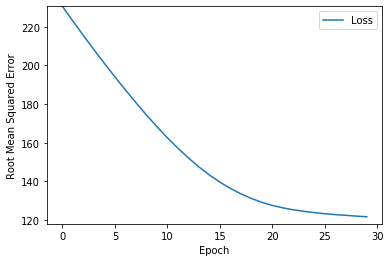

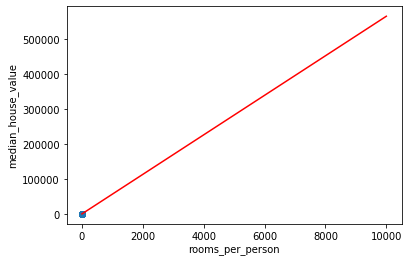

In [8]:
learning_rate = 0.05
epochs = 30
batch_size = 300

training_df['rooms_per_person'] = training_df['total_rooms'] / training_df['population']

my_feature = 'rooms_per_person'
my_label = 'median_house_value'

my_model = None

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

print(f'The learned weight of your model is {weight}')
print(f'The learned bias of your model is {bias}')

plot_the_loss_curve(epochs, rmse)
plot_the_model(weight, bias, my_feature, my_label)

In [9]:
def predict_house_values(n, feature, label):
    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)
    
    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$   diffrence")
    print("-------------------------------------------------")
    
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][i], training_df[label][i], predicted_values[i][0]) + "            {}".format(predicted_values[i][0] - training_df[label][i]))

predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$   diffrence
-------------------------------------------------
    6     67             169            102.33463287353516
    7     80             186            105.88973236083984
    2     86             178            92.2294921875
    3     73             201            127.93755340576172
    2     66             166            100.0626220703125
    2     74             221            147.16632080078125
    2     82             200            117.55101776123047
    2     48             218            169.8094482421875
    2     58             311            252.51492309570312
    2     48             205            157.12673950195312


In [10]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 16s 956us/sample - loss: 8744.1769 - root_mean_squared_error: 93.5104 - loss: 8824.
Epoch 2/30
17000/17000 [==============================] - 11s 641us/sample - loss: 7029.1080 - root_mean_squared_error: 83.8398
Epoch 3/30
17000/17000 [==============================] - 13s 737us/sample - loss: 7026.9308 - root_mean_squared_error: 83.8267
Epoch 4/30
17000/17000 [==============================] - 2727s 160ms/sample - loss: 7035.1495 - root_mean_squared_error: 83.8758
Epoch 5/30
17000/17000 [==============================] - 21s 1ms/sample - loss: 7031.0872 - root_mean_squared_error: 83.85160s - loss: 7032.3209 - root_mea
Epoch 6/30
17000/17000 [==============================] - 24s 1ms/sample - loss: 7032.5446 - root_mean_squared_error: 83.8602
Epoch 7/30
17000/17000 [==============================] - 26s 2ms/sample - loss: 7035.5706 - root_mean_squared_error: 83.8783
Epoch 8/30
17000/17000 [================

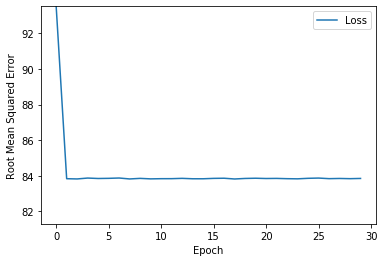

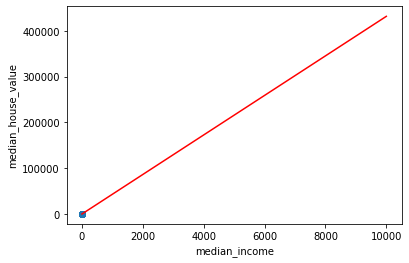

In [11]:
learning_rate = 0.08
epochs = 30
batch_size = 3

training_df['rooms_per_person'] = training_df['total_rooms'] / training_df['population']

my_feature = 'median_income'
my_label = 'median_house_value'

my_model = None

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

print(f'The learned weight of your model is {weight[0]}')
print(f'The learned bias of your model is {bias[0]}')

plot_the_loss_curve(epochs, rmse)
plot_the_model(weight, bias, my_feature, my_label)

In [12]:
def predict_house_values(n, feature, label):
    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)
    
    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$   diffrence")
    print("-------------------------------------------------")
    
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][i], training_df[label][i], predicted_values[i][0]) + "            {}".format(predicted_values[i][0] - training_df[label][i]))

predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$   diffrence
-------------------------------------------------
    1     67             131            64.14043426513672
    2     80             211            130.42855834960938
    2     86             151            65.63563537597656
    3     73             129            55.56774139404297
    2     66             151            85.17929077148438
    3     74             145            70.8541259765625
    3     82             461            378.12664794921875
    2     48             260            211.01773071289062
    2     58             144            85.51709747314453
    2     48             220            171.69094848632812
